In [1]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\DAEM-Modified.xlsx')
s1 = wb['Darrow\'s blueberry_dead']
t = get_xcel_col(s1, 'A', 11, 57)
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

A1 = 60000
A2 = 10
E1 = 70000
E2 = 70000
Y1 = .5
Y2 = .1

def r_m(A1,A2,E1,E2,Y1,Y2):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -(A1*np.exp(-E1/R/T[0]))*m[0]
    dV[0] = (Y1*A1*np.exp(-E1/R/T[0]))*m[0]

    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        if(T[i]-273.15 < 290):
            dm[i] = -(A1*np.exp(-E1/R/T[i]))*m[i]
            dV[i] = (Y1*A1*np.exp(-E1/R/T[i]))*m[i]
        else:
            dm[i] = -(A2*np.exp(-E2/R/T[i]))*m[i]
            dV[i] = (Y2*A2*np.exp(-E2/R/T[i]))*m[i]
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def f(X):
    A1,A2,E1,E2,Y1,Y2 = X
    e1 = (r_e(V_e, t)[0]*1000 - r_m(A1,A2,E1,E2,Y1,Y2)[2]*1000)**2
    e2 = (V_e[1:46] - r_m(A1,A2,E1,E2,Y1,Y2)[1])**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A1,A2,E1,E2,Y1,Y2))
A1,A2,E1,E2,Y1,Y2 = res.x
print(A1)
print(A2)
print(E1)
print(E2)
print(Y1)
print(Y2)


e1 = (r_e(V_e, t)[0] - r_m(A1,A2,E1,E2,Y1,Y2)[2])**2
e2 = (V_e[1:46] - r_m(A1,A2,E1,E2,Y1,Y2)[1])**2


59894.194221159094
3787.087048372186
71386.28980197584
69989.90618218647
0.31957602369665644
8.237104375068045


In [59]:
t2 = get_xcel_col(s1, 'Q', 11, 56)
T_c2 = get_xcel_col(s1, 'R', 11, 56)
T2 = T_c2 + np.array(273.15)
m_e2 = get_xcel_col(s1, 'T', 11, 56)
c2 = m_e2 / np.array(s1['T11'].value)
V_e2 = 1 - c2
def r_e2(V_e2, t2):
    dV_e2 = []
    dt12 = []
    dm_e2 = []
    for i in range(1, len(V_e2)):
        dV_e2.append(V_e2[i] - V_e2[i-1])
        dm_e2.append(m_e2[i] - m_e2[i-1])
    for i in range(1, len(t2)):
        dt12.append(t2[i] - t2[i-1])
    dV_e2 = np.array(dV_e2)
    dm_e2 = np.array(dm_e2)
    dt12 = np.array(dt12)
    r_e2 = dV_e2 / dt12
    r_em2 = dm_e2 / dt12
    return(r_e2, r_em2)

A12 = 40000
A22 = 2000
E12 = 70000
E22 = 70000
Y12 = .5
Y22 = .5

def r_m2(A12,A22,E12,E22,Y12,Y22):
    V2 = np.zeros(len(t2)-1)
    m2 = np.zeros(len(t2)-1)
    dt22 = np.zeros(len(t2)-1)
    dV2 = np.zeros(len(t2)-1)
    dm2 = np.zeros(len(t2)-1)
    for i in range(1, len(t2)-1):
        dt22[i] = t2[i] - t2[i-1] 
        
    m2[0] = 1
    V2[0] = 0
    dm2[0] = -(A12*np.exp(-E12/R/T2[0]))*m2[0]
    dV2[0] = (Y12*A12*np.exp(-E12/R/T2[0]))*m2[0]

    for i in range(1, len(t2)-1):
        m2[i] = m2[i-1]+dm2[i-1]*dt22[i]
        if(T2[i]-273.15 < 290):
            dm2[i] = -(A12*np.exp(-E12/R/T2[i]))*m2[i]
            dV2[i] = (Y12*A12*np.exp(-E12/R/T2[i]))*m2[i]
        else:
            dm2[i] = -(A22*np.exp(-E22/R/T2[i]))*m2[i]
            dV2[i] = (Y22*A22*np.exp(-E22/R/T2[i]))*m2[i]
        V2[i] = V2[i-1]+dV2[i-1]*dt22[i]
        
    return(m2, V2, dV2, dm2)
def f2(X):
    A12,A22,E12,E22,Y12,Y22 = X
    e12 = (r_e2(V_e2, t2)[0] - r_m2(A12,A22,E12,E22,Y12,Y22)[2])**2
    e22 = (V_e2[1:45] - r_m2(A12,A22,E12,E22,Y12,Y22)[1])**2
    return(sum(e12) + sum(e22))

res = minimize(f,(A12,A22,E12,E22,Y12,Y22))
A12,A22,E12,E22,Y12,Y22 = res.x
print(A12)
print(A22)
print(E12)
print(E22)
print(Y12)
print(Y22)


e12 = (r_e2(V_e2, t2)[0] - r_m2(A12,A22,E12,E22,Y12,Y22)[2])**2
e22 = (V_e2[0:-1] - r_m2(A12,A22,E12,E22,Y12,Y22)[1])**2

40021.12294390739
3331.88618206356
69731.56642912049
69362.47856942336
0.3227463674085669
7.2269471578553794


In [60]:
t3 = get_xcel_col(s1, 'AG', 11, 55)
T_c3 = get_xcel_col(s1, 'AH', 11, 55)
T3 = T_c3 + np.array(273.15)
m_e3 = get_xcel_col(s1, 'AJ', 11, 55)
c3 = m_e3 / np.array(s1['AJ11'].value)
V_e3 = 1 - c3
def r_e3(V_e3, t3):
    dV_e3 = []
    dt13 = []
    dm_e3 = []
    for i in range(1, len(V_e3)):
        dV_e3.append(V_e3[i] - V_e3[i-1])
        dm_e3.append(m_e3[i] - m_e3[i-1])
    for i in range(1, len(t3)):
        dt13.append(t3[i] - t3[i-1])
    dV_e3 = np.array(dV_e3)
    dm_e3 = np.array(dm_e3)
    dt13 = np.array(dt13)
    r_e3 = dV_e3 / dt13
    r_em3 = dm_e3 / dt13
    return(r_e3, r_em3)

A13 = 60000
A23 = 2000
E13 = 70000
E23 = 80000
Y13 = .5
Y23 = .5

def r_m3(A13,A23,E13,E23,Y13,Y23):
    V3 = np.zeros(len(t3)-1)
    m3 = np.zeros(len(t3)-1)
    dt23 = np.zeros(len(t3)-1)
    dV3 = np.zeros(len(t3)-1)
    dm3 = np.zeros(len(t3)-1)
    for i in range(1, len(t3)-1):
        dt23[i] = t3[i] - t3[i-1] 
        
    m3[0] = 1
    V3[0] = 0
    dm3[0] = -(A13*np.exp(-E13/R/T3[0]))*m3[0]
    dV3[0] = (Y13*A13*np.exp(-E13/R/T3[0]))*m3[0]

    for i in range(1, len(t3)-1):
        m3[i] = m3[i-1]+dm3[i-1]*dt23[i]
        if(T3[i]-273.15 < 290):
            dm3[i] = -(A13*np.exp(-E13/R/T3[i]))*m3[i]
            dV3[i] = (Y13*A13*np.exp(-E13/R/T3[i]))*m3[i]
        else:
            dm3[i] = -(A23*np.exp(-E23/R/T3[i]))*m3[i]
            dV3[i] = (Y23*A23*np.exp(-E23/R/T3[i]))*m3[i]
        V3[i] = V3[i-1]+dV3[i-1]*dt23[i]
        
    return(m3, V3, dV3, dm3)
def f3(X):
    A13,A23,E13,E23,Y13,Y23 = X
    e13 = (r_e3(V_e3, t3)[0] - r_m3(A13,A23,E13,E23,Y13,Y23)[2])**2
    e23 = (V_e3[1:44] - r_m3(A13,A23,E13,E23,Y13,Y23)[1])**2
    return(sum(e13) + sum(e23))

res = minimize(f,(A13,A23,E13,E23,Y13,Y23))
A13,A23,E13,E23,Y13,Y23 = res.x
print(A13)
print(A23)
print(E13)
print(E23)
print(Y13)
print(Y23)


e13 = (r_e3(V_e3, t3)[0] - r_m3(A13,A23,E13,E23,Y13,Y23)[2])**2
e23 = (V_e3[0:-1] - r_m3(A13,A23,E13,E23,Y13,Y23)[1])**2

59876.04091211096
10809.64701297345
71402.50804622736
74932.25880877592
0.32106791543881535
7.9195815323515


In [61]:
A1T = 20800
E1T = 66200
Y1T = .3
A2T = 40839
E2T = 82350
Y2T = 0.313

def totf(XT):
    A1T,A2T,E1T,E2T,Y1T,Y2T = XT
    e1 = (r_e(V_e, t)[0]*1000 - r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[2]*1000)**2
    e2 = (V_e[0:-1] - r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[1])**2
    e12 = (r_e2(V_e2, t2)[0]*1000 - r_m2(A1T,A2T,E1T,E2T,Y1T,Y2T)[2]*1000)**2
    e22 = (V_e2[0:-1] - r_m2(A1T,A2T,E1T,E2T,Y1T,Y2T)[1])**2
    e13 = (r_e3(V_e3, t3)[0]*1000 - r_m3(A1T,A2T,E1T,E2T,Y1T,Y2T)[2]*1000)**2
    e23 = (V_e3[0:-1] - r_m3(A1T,A2T,E1T,E2T,Y1T,Y2T)[1])**2
    return(sum(e1) + sum(e2) + sum(e12) + sum(e22) + sum(e13) + sum(e23))
res = minimize(totf,(A1T,A2T,E1T,E2T,Y1T,Y2T))
A1T,A2T,E1T,E2T,Y1T,Y2T = res.x
print(A1T)
print(A2T)
print(E1T)
print(E2T)
print(Y1T)
print(Y2T)

219.21558622033538
0.29713663129175155
48827.69075000211
21146.46649179637
0.5174836658754242
0.8954258609057848


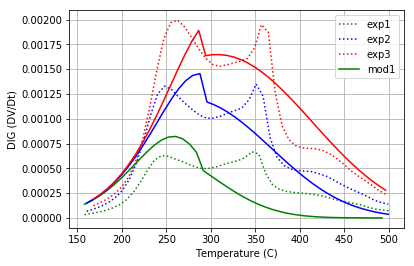

In [62]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c2[0:44],r_e2(V_e2,t2)[0],linestyle = ':',color = 'Blue',label='exp2')
plt.plot(T_c3[0:43],r_e3(V_e3,t3)[0],linestyle = ':',color = 'red',label='exp3')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.plot(T_c[1:45],r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[2][1:45],color = 'green',label='mod1')
plt.plot(T_c2[0:44],r_m2(A1T,A2T,E1T,E2T,Y1T,Y2T)[2],color = 'blue')
plt.plot(T_c3[0:43],r_m3(A1T,A2T,E1T,E2T,Y1T,Y2T)[2],color = 'red')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

In [56]:
A1n = 20800
E1n = 66200
Y1n = .3
A2n = 40839
E2n = 82350
Y2n = 0.313
def nm(A1n,E1n,Y1n):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -(A1n*np.exp(-E1n/R/T[0]))*m[0]
    dV[0] = (Y1n*A1n*np.exp(-E1n/R/T[0]))*m[0]

    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -((A1n*np.exp(-E1n/R/T[i])))*m[i]
        dV[i] = ((Y1n*A1n*np.exp(-E1n/R/T[i])))*m[i]   
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def nm2(A2n,E2n,Y2n):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -(A2n*np.exp(-E2n/R/T[0]))*m[0]
    dV[0] = (Y2n*A2n*np.exp(-E2n/R/T[0]))*m[0]

    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -(A2n*np.exp(-E2n/R/T[i]))*m[i]
        dV[i] = (Y2n*A2n*np.exp(-E2n/R/T[i]))*m[i]   
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)

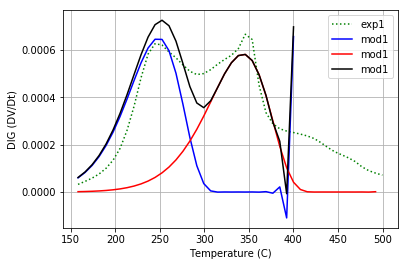

In [57]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:33],nm(A1n,E1n,Y1n)[2][1:33],color = 'blue',label='mod1')
plt.plot(T_c[1:45],nm2(A2n,E2n,Y2n)[2][1:45],color = 'red',label='mod1')
plt.plot(T_c[1:33],nm(A2n,E2n,Y2n)[2][1:33]+nm(A1n,E1n,Y1n)[2][1:33],color = 'black',label='mod1')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

In [10]:
A1n = 22800
A2n = 12040
E1n = 66200
E2n = 75968
Y1n = .3
Y2n = .23
def nmt(A1n,A2n,E1n,E2n,Y1n,Y2n):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -((A1n*np.exp(-E1n/R/T[0]))+(A2n*np.exp(-E2n/R/T[0])))*m[0]
    dV[0] = ((Y1n*A1n*np.exp(-E1n/R/T[0]))+(Y2n*A2n*np.exp(-E2n/R/T[0])))*m[0]

    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -((A1n*np.exp(-E1n/R/T[i]))+(A2n*np.exp(-E2n/R/T[i])))*m[i]
        dV[i] = ((Y1n*A1n*np.exp(-E1n/R/T[i]))+(Y2n*A2n*np.exp(-E2n/R/T[i])))*m[i]   
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)

In [13]:
print(nmt(A1n,A2n,E1n,E2n,Y1n,Y2n)[2])

[ 4.80845890e-05  6.73816249e-05  9.29277948e-05  1.26091600e-04
  1.68199586e-04  2.20313064e-04  2.82817177e-04  3.54913810e-04
  4.33739368e-04  5.14155692e-04  5.86754451e-04  6.39774830e-04
  6.59513934e-04  6.33080957e-04  5.54739446e-04  4.31323887e-04
  2.84753992e-04  1.48720101e-04  5.35738582e-05  9.10426096e-06
 -4.79596280e-07  1.49479067e-07 -9.15907197e-08  8.79978016e-08
 -1.19864439e-07  2.18574995e-07 -5.14052139e-07  1.51898225e-06
 -5.53044516e-06  2.44365641e-05 -1.29453351e-04  8.14008579e-04
 -6.02370932e-03  5.20738445e-02 -5.22562959e-01  6.05406567e+00
 -8.05515039e+01  1.22461192e+03 -2.11847110e+04  4.15467378e+05
 -9.20372761e+06  2.29660999e+08 -6.43555778e+09  2.01961167e+11
 -7.07782727e+12]


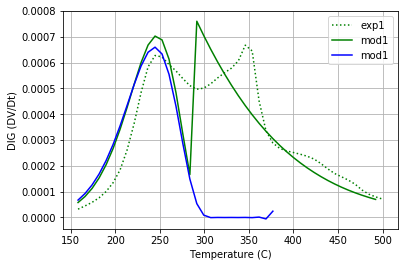

In [14]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:45],r_m(A1,A2,E1,E2,Y1,Y2)[2][1:45],color = 'green',label='mod1')
plt.plot(T_c[1:30],nmt(A1n,A2n,E1n,E2n,Y1n,Y2n)[2][1:30],color = 'blue',label='mod1')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

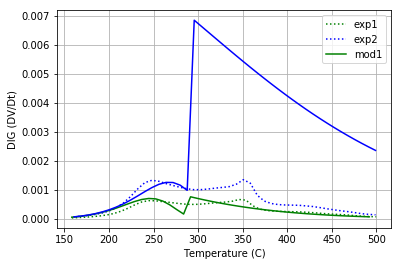

In [15]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c2[0:44],r_e2(V_e2,t2)[0],linestyle = ':',color = 'Blue',label='exp2')
#plt.plot(T_c3[0:43],r_e3(V_e3,t3)[0],linestyle = ':',color = 'red',label='exp3')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.plot(T_c[1:45],r_m(A1,A2,E1,E2,Y1,Y2)[2][1:45],color = 'green',label='mod1')
plt.plot(T_c2[0:44],r_m2(A12,A22,E12,E22,Y12,Y22)[2],color = 'blue')
#plt.plot(T_c3[0:43],r_m3(A13,A23,E13,E23,Y13,Y23)[2],color = 'red')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

IndexError: tuple index out of range

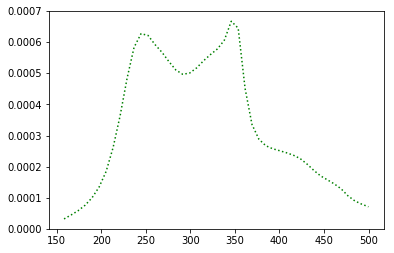

In [16]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:28],r_m(A1,A2,E1,E2,Y1,Y2)[4][1:28],color = 'b',label='mod11')
#plt.plot(T_c[16:45],r_m(A1,A2,E1,E2,Y1,Y2)[5][16:45],color = 'r',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

In [ ]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[16:45],r_m(A1,A2,E1,E2,Y1,Y2)[5][16:45],color = 'r',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

In [ ]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:32],r_m(A1,A2,E1,E2,Y1,Y2)[6][1:32],color = 'r',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()